In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load dataset
data = pd.read_csv("insurance.csv")
print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# Mengubah data kategorikal menjadi numerik
data_encoded = pd.get_dummies(data, drop_first=True)

# Pisahkan fitur dan target
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [5]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


In [6]:
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train_scaled, y_train_scaled)


SVR()

In [7]:
# Prediksi di test set
y_pred_scaled = model_svr.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Hitung MSE dan R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Hasil Evaluasi Model SVR:")
print("MSE:", mse)
print("R2 Score:", r2)


Hasil Evaluasi Model SVR:
MSE: 21380312.04694896
R2 Score: 0.8622834992498352


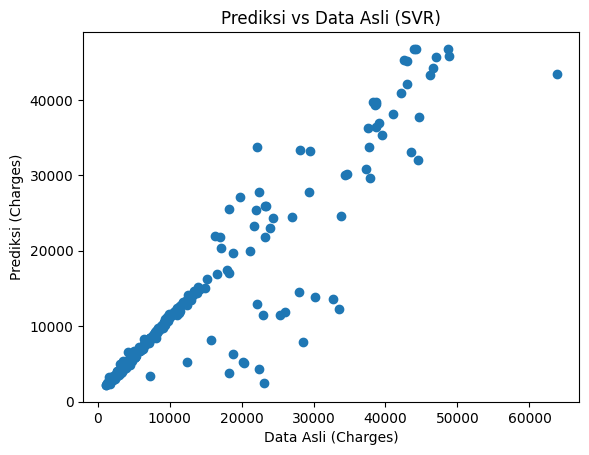

In [8]:
plt.scatter(y_test, y_pred)
plt.title("Prediksi vs Data Asli (SVR)")
plt.xlabel("Data Asli (Charges)")
plt.ylabel("Prediksi (Charges)")
plt.show()


In [11]:
# Contoh input sesuai urutan kolom X (8 fitur)
contoh = pd.DataFrame([{
    'age': 40,
    'bmi': 30,
    'children': 2,
    'sex_male': 1,          # 1 = laki-laki, 0 = perempuan
    'smoker_yes': 0,        # 0 = bukan perokok
    'region_northwest': 0,
    'region_southeast': 1,  # tinggal di Southeast
    'region_southwest': 0
}])

# Transform ke skala standar
contoh_scaled = sc_X.transform(contoh)

# Prediksi dengan model SVR
prediksi_scaled = model_svr.predict(contoh_scaled)

# Kembalikan ke nilai asli (charges dalam USD)
prediksi = sc_y.inverse_transform(prediksi_scaled.reshape(-1, 1))

print("Prediksi Biaya Asuransi:", prediksi[0][0])


Prediksi Biaya Asuransi: 7603.407283268468



1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [12]:
import pandas as pd

# Load dataset
data = pd.read_csv("insurance.csv")

# Variabel target (Y)
y = data["charges"]

# Variabel bebas (X)
X = data.drop("charges", axis=1)

print("Fitur yang digunakan:\n", X.columns)
print("\nTarget yang digunakan:", y.name)


Fitur yang digunakan:
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

Target yang digunakan: charges



2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [13]:
import pandas as pd

# Load dataset
data = pd.read_csv("insurance.csv")

# Variabel bebas (fitur)
X = data.drop('charges', axis=1)

# Variabel target
y = data['charges']


In [14]:
from sklearn.model_selection import train_test_split

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data latih:", X_train.shape)
print("Jumlah data uji   :", X_test.shape)


Jumlah data latih: (1070, 6)
Jumlah data uji   : (268, 6)


3. Lakukan feature scaling jika diperlukan.



In [18]:
import pandas as pd

# Load dataset
data = pd.read_csv("insurance.csv")

# Ubah kolom kategorikal menjadi numerik (One-Hot Encoding)
data_encoded = pd.get_dummies(data, drop_first=True)

# Pisahkan fitur dan target
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit-transform hanya ke data latih
X_train_scaled = scaler.fit_transform(X_train)

# Transform data uji (tanpa fit lagi)
X_test_scaled = scaler.transform(X_test)


4. Buat model multiple linear regression menggunakan Scikit-Learn.



In [21]:
# 1. Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 2. Load Dataset
data = pd.read_csv("insurance.csv")

# 3. Identifikasi variabel bebas (X) dan variabel target (y)
X = data.drop('charges', axis=1)  # Fitur
y = data['charges']               # Target / Biaya Medis

# 4. Encoding untuk data kategorikal
X = pd.get_dummies(X, drop_first=True)

# 5. Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature Scaling (opsional tapi disarankan untuk regresi)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Buat & latih model Multiple Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 8. Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

# 9. Tampilkan contoh hasil prediksi
print("Contoh Hasil Prediksi:", y_pred[:5])
print("Contoh Nilai Asli:", y_test.head().values)


Contoh Hasil Prediksi: [ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656]
Contoh Nilai Asli: [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918 ]


5. Latih model pada data latih dan lakukan prediksi pada data uji.



In [22]:
# Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 1. Load Dataset
data = pd.read_csv("insurance.csv")

# 2. Pisahkan fitur (X) dan target (y)
X = data.drop('charges', axis=1)
y = data['charges']

# 3. Encoding data kategorikal
X = pd.get_dummies(X, drop_first=True)

# 4. Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Buat dan latih model Multiple Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 7. Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

# 8. Tampilkan hasil
print("✅ Model berhasil dilatih.")
print("🔹 Contoh hasil prediksi:", y_pred[:5])
print("🔹 Contoh nilai aktual   :", y_test.values[:5])


✅ Model berhasil dilatih.
🔹 Contoh hasil prediksi: [ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656]
🔹 Contoh nilai aktual   : [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918 ]



6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Hitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Tampilkan hasil evaluasi
print("=== Evaluasi Model Multiple Linear Regression ===")
print(f"R-squared (R²)   : {r2:.4f}")
print(f"MSE (Mean Squared Error) : {mse:.2f}")
print(f"RMSE (Root MSE)  : {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")


=== Evaluasi Model Multiple Linear Regression ===
R-squared (R²)   : 0.7836
MSE (Mean Squared Error) : 33596915.85
RMSE (Root MSE)  : 5796.28
MAE (Mean Absolute Error): 4181.19
